**Damage car detection model**

1) Mount drive, link your folder

In [ ]:
#mount drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


2) Creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive

In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive

# list the contents of /mydrive
!ls /mydrive

'05 Homework - ADT IntegerSet.gdoc'
'2022 - (CS   IT) F21'
 blender-3.6.0-linux-x64.tar.xz
 Capture.PNG
 Classroom
'Colab Notebooks'
'[FreeCoursesOnline.Me] Code With Mosh - Complete SQL Mastery'
'Marks Sheets'
'Process_Process Models.ppt'
 render
'RenderingWithGoogleColab (2).ipynb'
'Sameen Shahzad(bitf21m504),Damage_Car_detection_dataset'
 Untitled0.ipynb


3) Navigate to /mydrive/dataset folder

In [ ]:
#Navigate to /mydrive/CNN
%cd /content/gdrive/MyDrive/Sameen Shahzad(bitf21m504),Damage_Car_detection_dataset/data1a
!ls

/content/gdrive/MyDrive/Sameen Shahzad(bitf21m504),Damage_Car_detection_dataset/data1a
test  train


4) Importing Required Libraries

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

5) Understanding the Dataset

In [ ]:
base_dir = 'train'
Damaged_dir = os.path.join(base_dir,'Damaged')
Non_Damaged_dir = os.path.join(base_dir,'Non_Damaged')


In [ ]:
print("Damaged Car: ",len(os.listdir(Damaged_dir)))
print("Non_Damaged Car : ",len(os.listdir(Non_Damaged_dir)))


Damaged Car:  920
Non_Damaged Car :  920


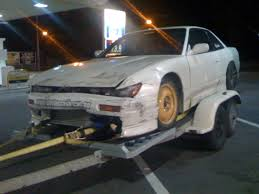

In [ ]:
import tensorflow as tf
random_image = random.sample(os.listdir(Damaged_dir), 10)
img = tf.keras.utils.load_img(f"{Damaged_dir}/{random_image[0]}")
img



In [ ]:
img = tf.keras.utils.img_to_array(img)
img.shape

(194, 259, 3)

6) Split Dataset for Training and Validation Data Preprocessing

In [ ]:

train_ds = tf.keras.utils.image_dataset_from_directory(
  base_dir,
  validation_split=0.2,
  subset="training",
  image_size=(180,180),
  batch_size=32,
  seed=42)

Found 1840 files belonging to 2 classes.
Using 1472 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  base_dir,
  validation_split=0.2,
  subset="validation",
  image_size=(180,180),
  batch_size=32,
  seed=42)


Found 1840 files belonging to 2 classes.
Using 368 files for validation.


In [ ]:
class_names = train_ds.class_names
class_names

['Damaged', 'Non_Damaged']

In [ ]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


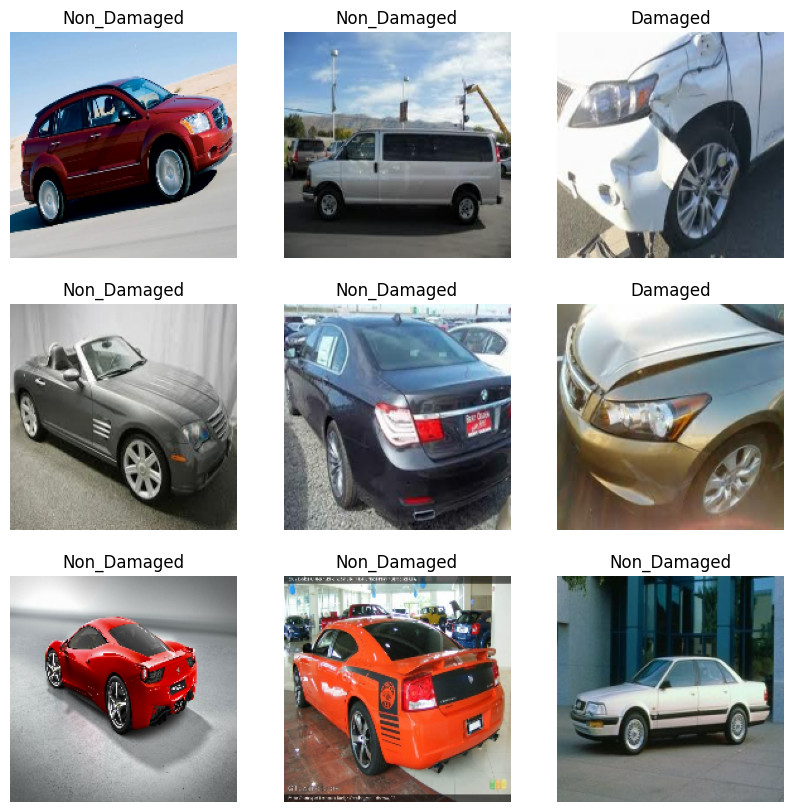

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

7) Configuring the Dataset for Performance

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

8) Data Augmentation

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical", seed=42),
  tf.keras.layers.RandomRotation(0.1, seed=42),
])

9) Plot images after Data Augmentation

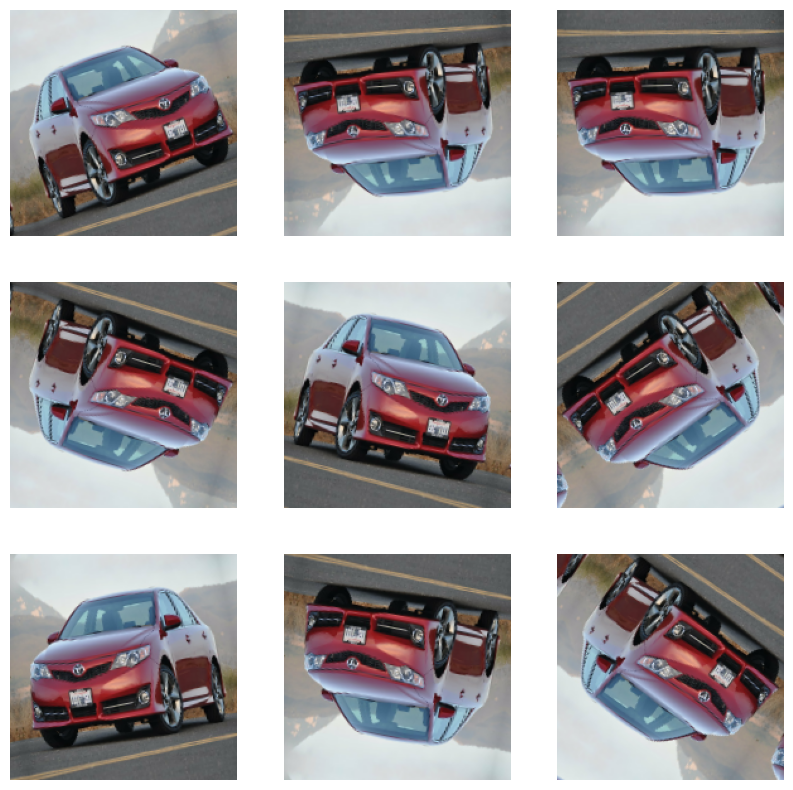

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")


10) Building the Convulutional Neural Network (CNN) Model

In [ ]:
NUM_CLASSES = len(class_names)
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    data_augmentation,
    # The first CNN layer
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    # The second CNN layer
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    # The third CNN layer
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    # The fourth CNN layer
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES)
])

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 128)       0         
 g2D)                                                 

11) Compile and Train Model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15,
)


Epoch 1/15
46/46 [==============================] - 57s 1s/step - loss: 0.7443 - accuracy: 0.5000 - val_loss: 0.6844 - val_accuracy: 0.5707
Epoch 2/15
46/46 [==============================] - 4s 94ms/step - loss: 0.6783 - accuracy: 0.5747 - val_loss: 0.7007 - val_accuracy: 0.5054
Epoch 3/15
46/46 [==============================] - 4s 96ms/step - loss: 0.6700 - accuracy: 0.6046 - val_loss: 0.6146 - val_accuracy: 0.6250
Epoch 4/15
46/46 [==============================] - 4s 96ms/step - loss: 0.6387 - accuracy: 0.6250 - val_loss: 0.6095 - val_accuracy: 0.6440
Epoch 5/15
46/46 [==============================] - 4s 94ms/step - loss: 0.6271 - accuracy: 0.6508 - val_loss: 0.6049 - val_accuracy: 0.6304
Epoch 6/15
46/46 [==============================] - 4s 93ms/step - loss: 0.5999 - accuracy: 0.6800 - val_loss: 0.6183 - val_accuracy: 0.6630
Epoch 7/15
46/46 [==============================] - 4s 97ms/step - loss: 0.5720 - accuracy: 0.7052 - val_loss: 0.5982 - val_accuracy: 0.6848
Epoch 8/15
46/

12) Visualizing Training Accuracy and Loss Graphs

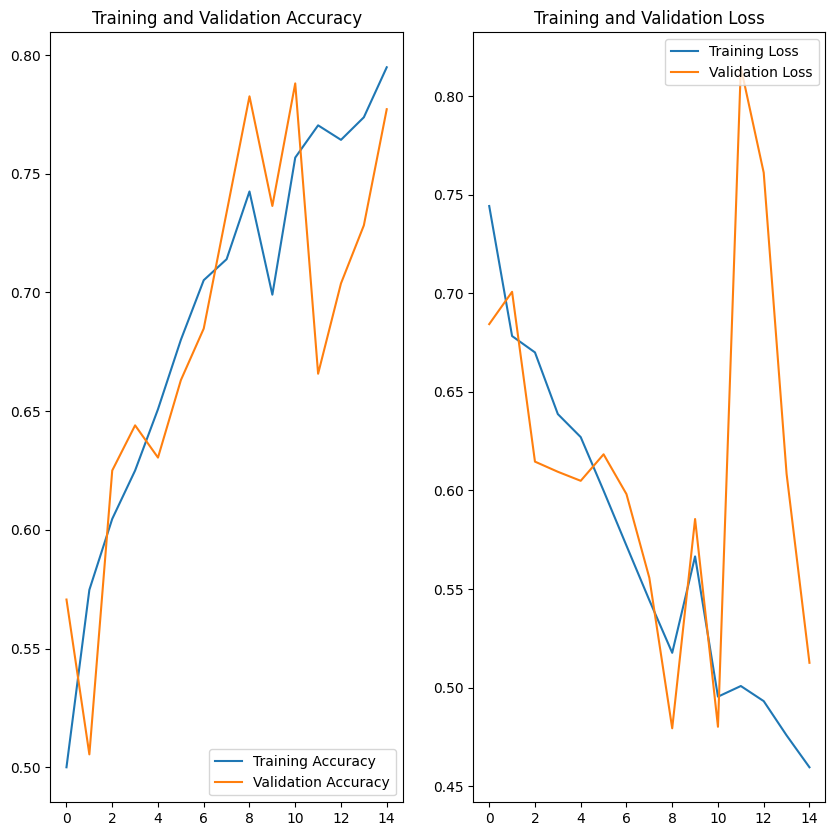

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



13) Confusion Matrix and Classification Report

12/12 [==============================] - 1s 33ms/step
Confusion Matrix:
[[107  63]
 [ 19 179]]

Classification Report:
              precision    recall  f1-score   support

     Damaged       0.85      0.63      0.72       170
 Non_Damaged       0.74      0.90      0.81       198

    accuracy                           0.78       368
   macro avg       0.79      0.77      0.77       368
weighted avg       0.79      0.78      0.77       368



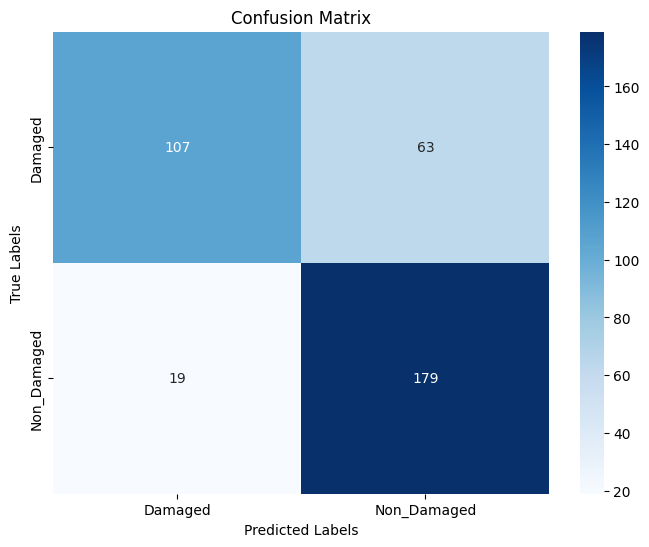

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'model' and 'train_ds', 'val_ds' are already defined

# Evaluate the model on the validation set
val_predictions = model.predict(val_ds)
val_true_labels = np.concatenate([y for x, y in val_ds], axis=0)

# Convert predicted probabilities to class labels
val_pred_labels = np.argmax(val_predictions, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(val_true_labels, val_pred_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print the classification report
class_report = classification_report(val_true_labels, val_pred_labels, target_names=class_names)
print("\nClassification Report:")
print(class_report)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


14) Save Trained Model

In [ ]:
from tensorflow.keras.models import load_model
# Save the entire model to a HDF5 file
model.save("CNNTrainedModel.keras")

15) Load Trained Model

In [ ]:
Trained_CNN_Model = load_model("CNNTrainedModel.keras")

16) Matrix of Predicted images of New Dataset

1/1 [==============================] - 0s 26ms/step


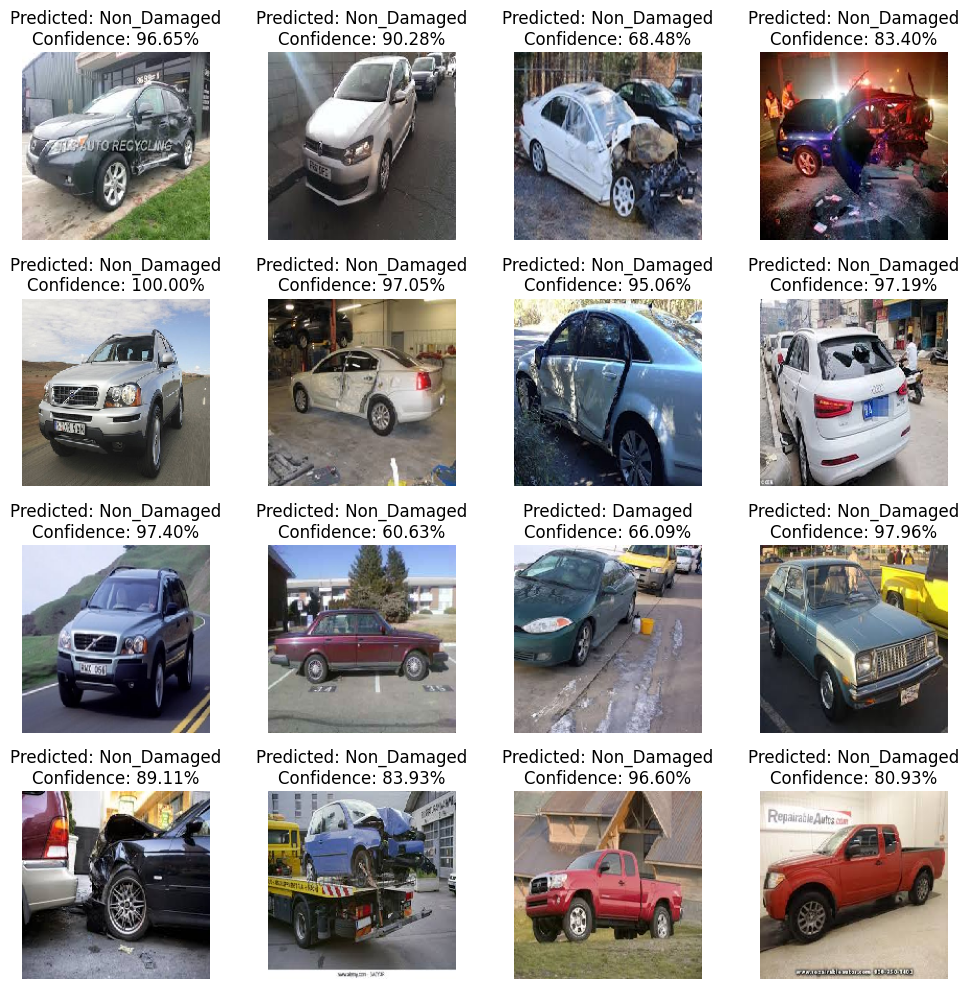

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Assuming 'model' and 'class_names' are already defined

test_dir = 'test'
num_images_to_predict = 16

# Get a list of 16 random images from the 'test' folder
random_images = random.sample(os.listdir(test_dir), num_images_to_predict)

# Set up subplots
rows = 4
cols = 4
fig, axs = plt.subplots(rows, cols, figsize=(10, 10))

for i in range(rows):
    for j in range(cols):
        # Load and preprocess the image
        random_image = random_images[i * cols + j]
        img = tf.keras.utils.load_img(f"{test_dir}/{random_image}", target_size=(180, 180))
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)  # Create a batch

        # Make predictions
        predictions = Trained_CNN_Model.predict(img_array)
        score = tf.nn.softmax(predictions[0])

        # Display the image
        axs[i, j].imshow(img)
        axs[i, j].axis("off")

        # Display the prediction results
        axs[i, j].set_title(
            f"Predicted: {class_names[np.argmax(score)]}\n"
            f"Confidence: {100 * np.max(score):.2f}%"
        )

plt.tight_layout()
plt.show()


17) Take image input from the Use and Predict Results

FileUpload(value={}, description='Upload')

1/1 [==============================] - 0s 135ms/step


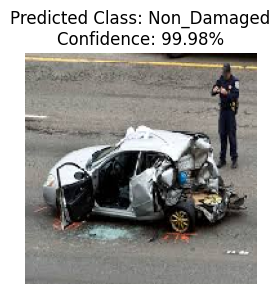

1/1 [==============================] - 0s 18ms/step


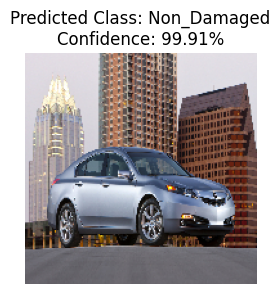

1/1 [==============================] - 0s 18ms/step


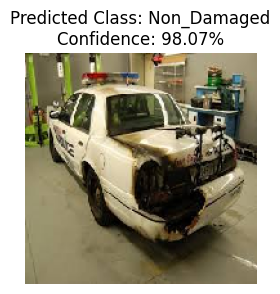

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from ipywidgets import FileUpload
from IPython.display import display

# Assuming 'model' and 'class_names' are already defined

# Function to preprocess the input image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(180, 180))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to handle image upload and prediction
def handle_upload(change):
    img = list(file_upload.value.values())[0]["content"]
    img_path = "temp_image.jpg"
    with open(img_path, "wb") as f:
        f.write(img)

    # Preprocess the input image
    input_img_array = preprocess_image(img_path)

    # Make prediction
    predictions = model.predict(input_img_array)
    score = tf.nn.softmax(predictions[0])

    # Display the input image with predicted class and confidence
    plt.figure(figsize=(6, 3))
    plt.imshow(image.load_img(img_path, target_size=(180, 180)))
    plt.axis("off")
    plt.title(
        "Predicted Class: {}\n"
        "Confidence: {:.2f}%"
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )
    plt.show()

# Create a FileUpload widget
file_upload = FileUpload()
file_upload.observe(handle_upload, names='value')

# Display the FileUpload widget
display(file_upload)
